In [1]:
from pymatgen.io.vasp.outputs import Vasprun
from pymatgen.core.physical_constants import c,h,e
import pymatgen.io.vasp.outputs2 as outputs2
import matplotlib.pyplot as plt
from math import sqrt,pi
import re
import numpy as np

In [2]:
vr_list = {}
#vr_list['cshift0.1']= Vasprun('/Users/yao/Google Drive/data/Si-dielectric/pbe-ip/k24/vasprun.xml')
#vr_list['cshift0.05']= Vasprun('/Users/yao/Google Drive/data/Si-dielectric/pbe-ip/k24/cshift0.05/vasprun.xml')
#vr_list['cshift0.02']= Vasprun('/Users/yao/Google Drive/data/Si-dielectric/pbe-ip/k24/cshift0.02/vasprun.xml')
vr_list['chi-nomega300']=outputs2.Vasprun('/Users/yao/Google Drive/data/Si-dielectric/hybrid-chi/k10/nomega300/vasprun.xml')
vr_list['chi-nomega1000']=outputs2.Vasprun('/Users/yao/Google Drive/data/Si-dielectric/hybrid-chi/k10/nomega1000/vasprun.xml')

//anaconda/lib/python3.5/site-packages/pymatgen/io/vasp/outputs2.py:813: UserWarning: No POTCAR file with matching TITEL fields was found in /Users/yao/Google Drive/data/Si-dielectric/hybrid-chi/k10/nomega300
  " was found in {}".format(os.path.abspath(p)))
//anaconda/lib/python3.5/site-packages/pymatgen/io/vasp/outputs2.py:813: UserWarning: No POTCAR file with matching TITEL fields was found in /Users/yao/Google Drive/data/Si-dielectric/hybrid-chi/k10/nomega1000
  " was found in {}".format(os.path.abspath(p)))


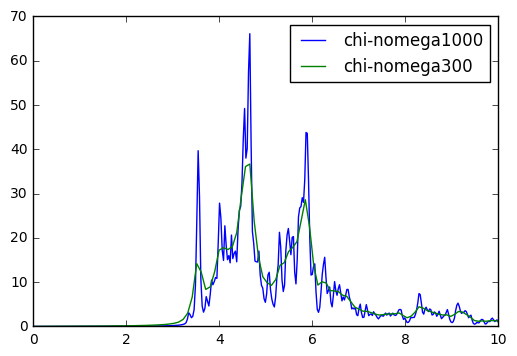

In [8]:
#dielectric
for kpoints in vr_list:
    energy = vr_list[kpoints].dielectric[0]
    real_tensor = vr_list[kpoints].dielectric[1]
    imag_tensor = vr_list[kpoints].dielectric[2]
    nedos = len(energy)
    real_iso = []
    imag_iso = []
    for i in range(nedos):
        real_iso.append(real_tensor[i][0])
        imag_iso.append(imag_tensor[i][0])
    plt.plot(energy, imag_iso, label=kpoints)
plt.legend()
plt.xlim([0,10])
plt.show()

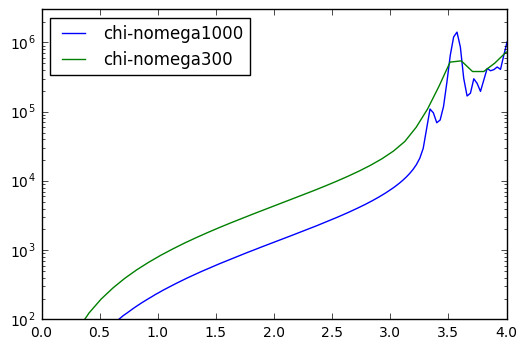

In [7]:
# absorption

for kpoints in vr_list:
    energy = vr_list[kpoints].dielectric[0]
    real_tensor = vr_list[kpoints].dielectric[1]
    imag_tensor = vr_list[kpoints].dielectric[2]
    nedos = len(energy)
    real_iso = []
    imag_iso = []
    for i in range(nedos):
        real_iso.append(real_tensor[i][0])
        imag_iso.append(imag_tensor[i][0])
    
# isotropic
    constant = 4*pi*e/(h*c)*0.01 
    norm_iso = np.zeros(nedos)
    k_iso = np.zeros(nedos)
    absorb_iso = np.zeros(nedos)
    for i in range(nedos):
        norm_iso[i] = sqrt(imag_iso[i]**2+real_iso[i]**2)
        k_iso[i] = sqrt(2)/2*sqrt(norm_iso[i]-real_iso[i])
        absorb_iso[i] = energy[i]*k_iso[i]*constant
    plt.semilogy(energy, absorb_iso, label=kpoints)

plt.legend(loc = 'upper left')
plt.ylim([1e2,3e6])
plt.xlim([0,4])
plt.show()